This is an example of using python for web scrapping, I used the NASDAQ major indices table as it had some interesting features like spliting on a column and unicode for up/down symbols. The percentage change had to be recalculated for gains or losses.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import requests                
from bs4 import BeautifulSoup
from IPython.core.display import HTML

In [2]:
url = "http://www.nasdaq.com/markets/indices/major-indices.aspx"
response = requests.get(url)
print response
scraping = BeautifulSoup(response.content, 'lxml')
scraping_html_indices = scraping.find_all("table", "USMN_MarketIndices")
df = pd.read_html(str(scraping_html_indices))
stock_index = df[0]
stock_index.drop(stock_index.index[[0]], inplace=True)
stock_index['Symbol'] = stock_index['Symbol'].str.partition('\\n')[2]
stock_index['Symbol'] = stock_index['Symbol'].str.partition('\\n')[0]
stock_index['Change_Net'] = stock_index['Change Net / %'].str.partition('\\xa')[0]
stock_index['change'] = stock_index['Change Net / %'].str.partition('\\xa')[2]
stock_index['Change_percent'] = stock_index['change'].str.partition('\\xa')[2]
stock_index['Change_Net'].replace('unch', '0', inplace=True)
stock_index['Change_percent'].replace('', '0', inplace=True)
def remove_percentage(x):
    return x.replace('%','')
stock_index['Change_percent'] = stock_index[['Change_percent']].applymap(remove_percentage)
stock_index['change'] = stock_index['change'].str.partition('\\xa')[0]
stock_index['change'].replace('0\u25bc', 'down', inplace=True)
stock_index['change'].replace('0\u25b2', 'up', inplace=True)
stock_index['change'].replace('', 'unchanged', inplace=True)
del stock_index['Change Net / %']

def func_perc_neg(row):
    if row['change'] == 'down':
        return row['Change_percent'] *-1
    elif row['change'] == 'up':
        return row['Change_percent']*1
    elif row['change'] == 'unchanged':
        return row['Change_percent']*1
    else:
        return 'no answer'

stock_index['Change_percent'] = pd.to_numeric(stock_index['Change_percent'])
stock_index['Change_percent'] = stock_index.apply(func_perc_neg, axis=1)
stock_index.rename(columns={'Index Value':'Index_Value'},inplace=True)

<Response [200]>


In [3]:
stock_index

,Symbol,Name,Index_Value,High,Low,Change_Net,change,Change_percent
1,XAX,Amex Composite,2741.31,2754.76,2729.2,12.12,up,0.44
2,VOLNDX,DWS NASDAQ-100 Volatility Target Index,1689.47,1689.47,1689.47,0,unchanged,0.00
3,FTSEQ500,FTSE NASDAQ 500 Index,5914.69,5946.98,5899.54,0,unchanged,0.00
4,RCMP,NASDAQ Capital Market Composite Index,180.47,182.54,180.46,0.91,down,-0.50
5,IXIC,NASDAQ Composite,7630,7740.26,7604.24,107.42,down,-1.39
6,NQGM,NASDAQ Global Market Composite,2309.63,2358.52,2308.8,47.55,down,-2.02
7,NQGS,NASDAQ Global Select Market Composite,3587.55,3639.19,3575,50.53,down,-1.39
8,QOMX,NASDAQ OMX 100 Index,1945.96,1945.96,1945.96,0,unchanged,0.00
9,ILTI,NASDAQ OMX AeA Illinois Tech Index,1054.38,1054.38,1054.38,0,unchanged,0.00
10,QMEA,NASDAQ OMX Middle East North Africa Index,128.54,128.54,128.54,0,unchanged,0.00


Text(0.5,1,'Stock Index Change')

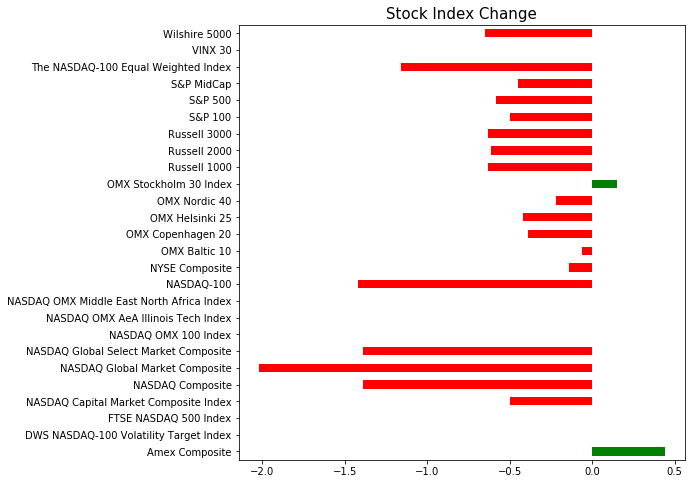

In [4]:
stock_index_bar = stock_index['Change_percent'].plot(kind='barh', figsize=(8, 8),
                                                     color=stock_index.change.map({'up': 'g', 'unchanged' :'r', 'down': 'r'}));
vals = stock_index_bar.get_xticks();
stock_index_bar.set_yticklabels(stock_index.Name);
plt.title ('Stock Index Change', fontsize=15)